In [1]:
import pathlib 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
import sleepPy.preprocessing as prep
import sleepPy.plots as plot
import actiPy.actogram_plot as aplot

In [2]:
def quickplot_h(data):
    data.resample("H").mean().plot(subplots=True,
                                  figsize=(10,10))
def quickplot(data):
    data.plot(subplots=True,
               figsize=(10,10))

In [3]:
col_names = ["Chamber", "PIR1", "PIR2", "PIR3", "PIR4", "PIR5", "PIR6", "LDR"]

In [4]:
pir_files_dir = pathlib.Path('/Users/angusfisk/Documents/01_PhD_files/09_pirdata')

exp_filesdir = pir_files_dir / "03_experiment_files"

save_dir = pathlib.Path("/Users/angusfisk/Documents/01_PhD_files/"
                        "01_projects/01_thesisdata/04_ageing/01_datafiles/01_activity")


In [5]:
# read df's in
exp = sorted(exp_filesdir.glob("exp_5*"))

file = exp[7]
df = pd.read_csv(file, 
                 index_col=[0],
                 parse_dates=True)

In [6]:
exp


[PosixPath('/Users/angusfisk/Documents/01_PhD_files/09_pirdata/03_experiment_files/exp_5_5A_pir_data.csv'),
 PosixPath('/Users/angusfisk/Documents/01_PhD_files/09_pirdata/03_experiment_files/exp_5_5B_pir_data.csv'),
 PosixPath('/Users/angusfisk/Documents/01_PhD_files/09_pirdata/03_experiment_files/exp_5_5C_pir_data.csv'),
 PosixPath('/Users/angusfisk/Documents/01_PhD_files/09_pirdata/03_experiment_files/exp_5_5D_pir_data.csv'),
 PosixPath('/Users/angusfisk/Documents/01_PhD_files/09_pirdata/03_experiment_files/exp_5_6A_pir_data.csv'),
 PosixPath('/Users/angusfisk/Documents/01_PhD_files/09_pirdata/03_experiment_files/exp_5_6B_pir_data.csv'),
 PosixPath('/Users/angusfisk/Documents/01_PhD_files/09_pirdata/03_experiment_files/exp_5_8C_pir_data.csv'),
 PosixPath('/Users/angusfisk/Documents/01_PhD_files/09_pirdata/03_experiment_files/exp_5_8D_pir_data.csv')]

In [7]:
df.columns=col_names
df.drop(col_names[0], axis=1, inplace=True)
df.sort_index(inplace=True)

In [8]:
df.head()

,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
2017-11-24 14:27:07.065,100.0,46.0,100.0,100.0,100.0,33.0,987.0
2017-11-24 14:27:17.072,100.0,49.0,100.0,100.0,100.0,35.0,989.0
2017-11-24 14:27:27.073,100.0,44.0,100.0,100.0,100.0,30.0,990.0
2017-11-24 14:27:37.079,100.0,49.0,100.0,100.0,100.0,35.0,987.0
2017-11-24 14:27:47.082,100.0,49.0,100.0,100.0,100.0,35.0,988.0


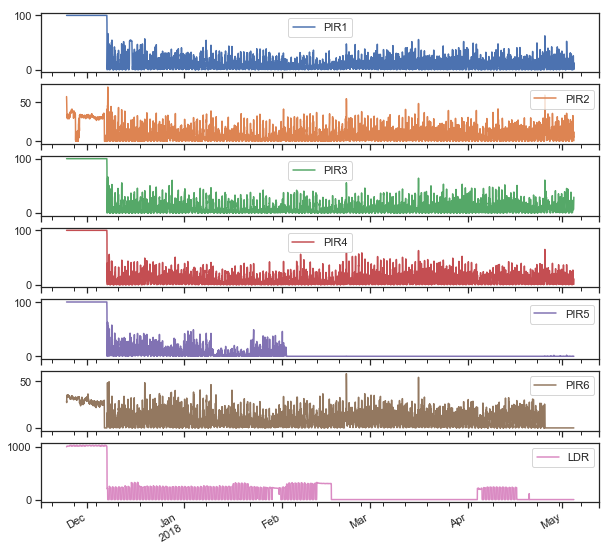

In [9]:
quickplot_h(df)

Next step - find hte post disrupted period of group housing and save it as a post file 


post_save_name = save_dir / "01_post_disrupt/ld_post.csv"

post_data.to_csv(post_save_name)

In [10]:
start_single = '2017-12-22'
end_single = '2018-04-03'

single_data = df.loc[start_single:end_single].copy()

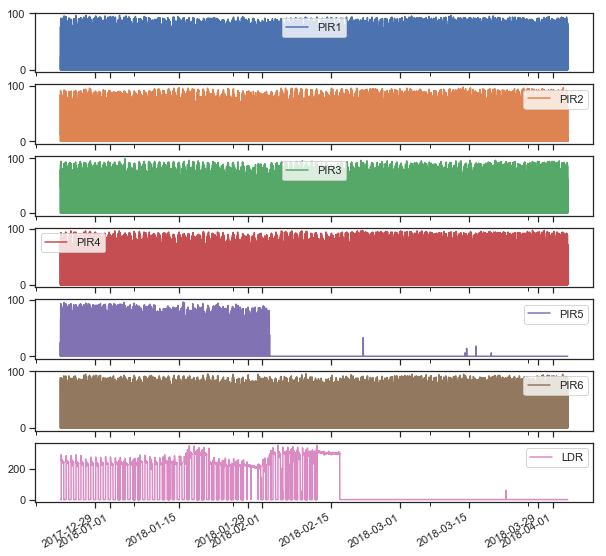

In [11]:
quickplot(single_data)

(<Figure size 720x1440 with 104 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1fdfc208>)

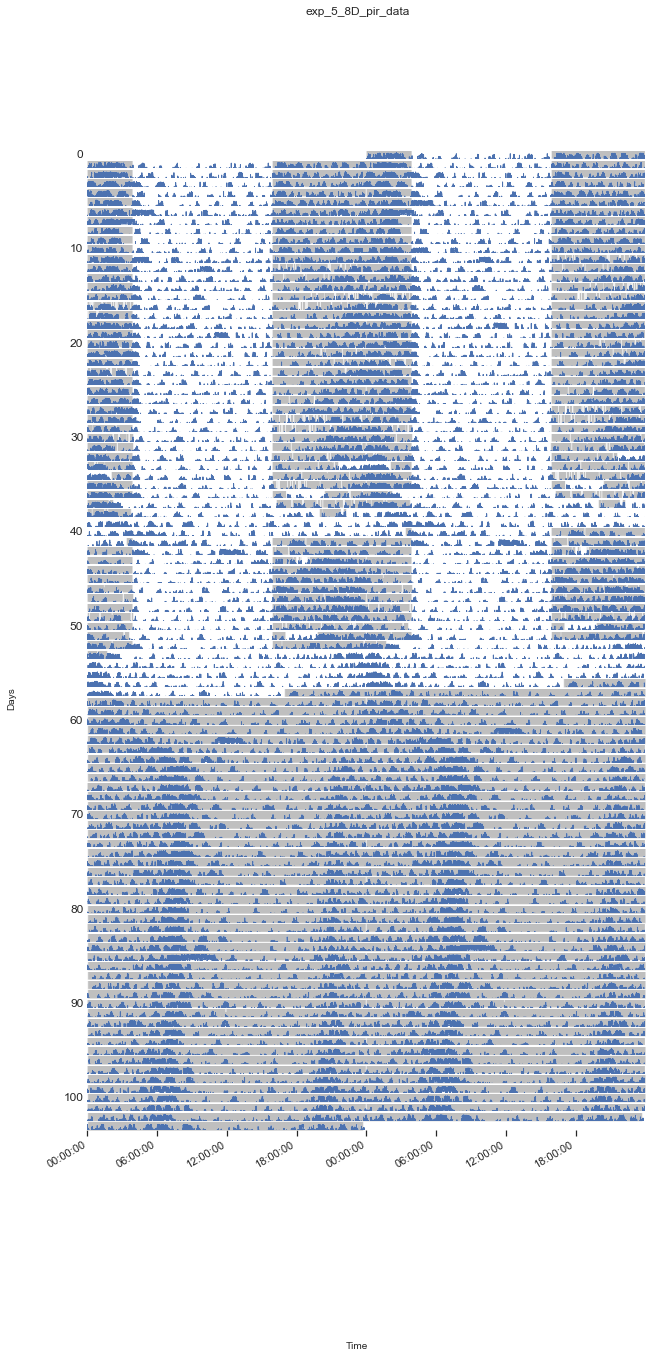

In [12]:
aplot._actogram_plot_from_df(single_data, 2, drop_level=False, fname=file, figsize=(10, 20))

In [13]:
dd_start = '2018-02-17'

ld_data = single_data.loc[start_single:dd_start]

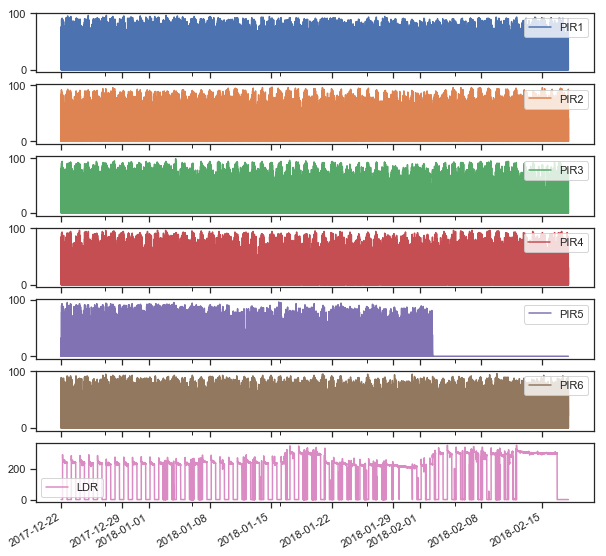

In [14]:
quickplot(ld_data)

In [15]:
label_col_name = "light_period"

In [16]:
single_data.loc[start_single:dd_start, label_col_name] = "ld"

In [17]:
dd_end = "2018-04-03"

dd_data = single_data.loc[dd_start:dd_end]

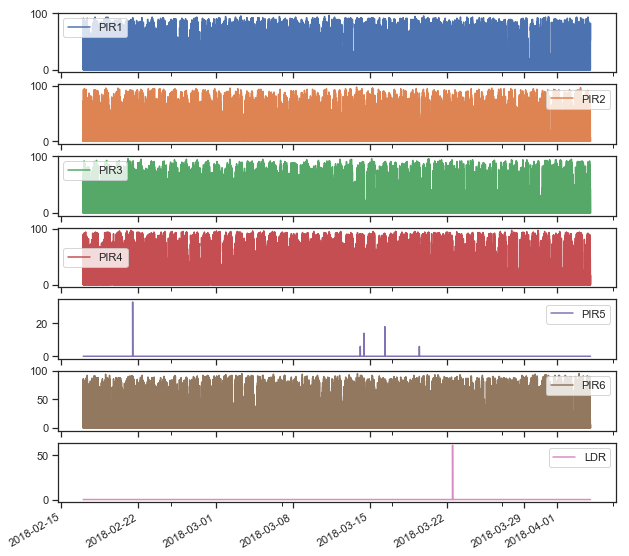

In [18]:
quickplot(dd_data)

In [19]:
single_data.loc[dd_start:dd_end, label_col_name] = "dd"

In [20]:
single_data.head()

,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR,light_period
2017-12-22 00:00:05.306,0.0,12.0,0.0,0.0,1.0,0.0,0.0,ld
2017-12-22 00:00:15.313,0.0,13.0,0.0,0.0,15.0,0.0,0.0,ld
2017-12-22 00:00:25.314,0.0,10.0,0.0,6.0,25.0,2.0,0.0,ld
2017-12-22 00:00:35.320,0.0,17.0,0.0,0.0,24.0,19.0,0.0,ld
2017-12-22 00:00:45.323,0.0,5.0,0.0,0.0,0.0,20.0,0.0,ld


In [22]:
single_save_name = save_dir / "03_single_housed/ld_02.csv"

single_data.to_csv(single_save_name)